In [32]:
suppressPackageStartupMessages({
  library(future)
  library(Seurat)
  library(tidyverse)
  library(Seurat)
  library(ggplot2)
  library(ggrastr)   # for geom_point_rast()
  library(ggrepel)   # for geom_text_repel()
  library(dplyr)
  library(forcats)
  library(pals)      # for glasbey palette (distinct, color-blind-friendly)
  library(stringr)  
  library(RColorBrewer) # For generating high-quality color palettes
  library(cowplot)      # For the 'theme_cowplot' (a clean, minimal theme)
})

# Load Data

In [2]:
obj <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/harmony_cleaned_annotated.rds')
obj

An object of class Seurat 
74637 features across 352654 samples within 2 assays 
Active assay: SCT (36031 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap, harmony, umap.harmony

In [3]:
obj@meta.data |> head()

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCAAGTCAAGCG-1,PRJNA1125010,6520,1839,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,6.1196319,singlet,⋯,5,33,36,31,31,31,51,49,49,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACCCACATTGCCGG-1,PRJNA1125010,4533,1962,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,14.7804986,singlet,⋯,10,6,20,18,21,19,18,32,32,Mesenchymal_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAAAGCTCTGTA-1,PRJNA1125010,50471,7374,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,7.7450417,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGAATCCCATAAG-1,PRJNA1125010,41082,7762,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,5.9661165,singlet,⋯,5,37,19,21,20,32,35,58,58,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAACGCTAGTCACTAC-1,PRJNA1125010,11161,3306,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.5286265,singlet,⋯,4,3,2,1,3,0,25,18,18,OPC_like
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AAAGAACAGTGTCATC-1,PRJNA1125010,2965,1417,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,8.5666105,singlet,⋯,23,34,35,37,39,39,41,42,42,Stromal/Endothelial


In [4]:
Idents(obj) <- 'SCT_snn_res.0.2'

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


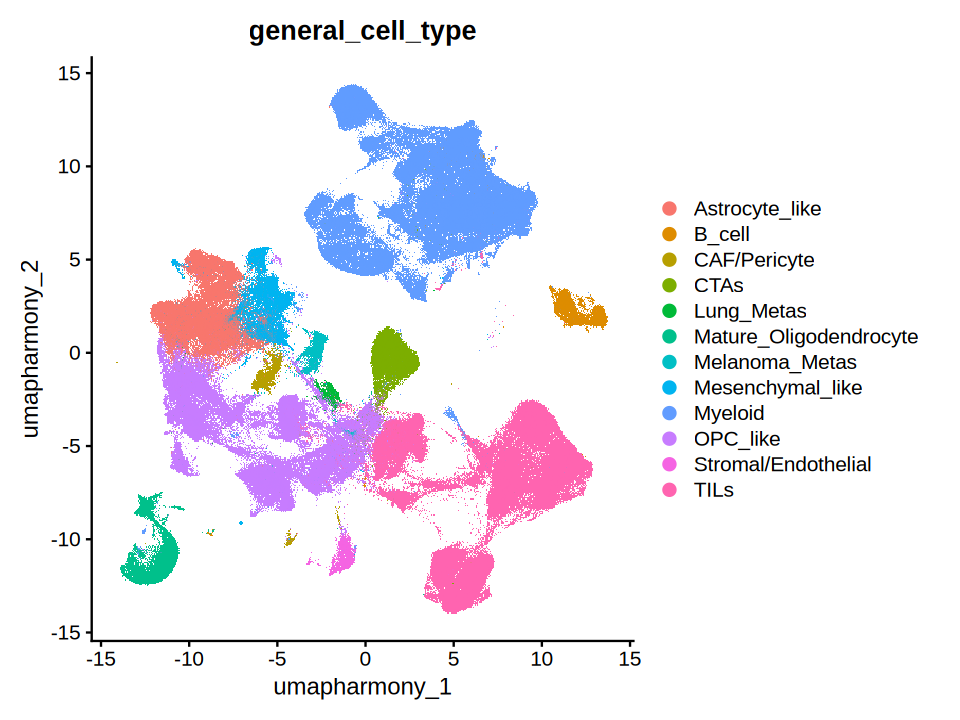

In [5]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(obj, reduction = 'umap.harmony', group.by = 'general_cell_type', label = FALSE)

In [33]:
# Get all unique cell types from the specified metadata column
cell_types <- levels(factor(obj$general_cell_type))
num_cell_types <- length(cell_types)

message(paste("Found", num_cell_types, "cell types in 'general_cell_type' metadata."))

Found 12 cell types in 'general_cell_type' metadata.



In [34]:
polychrome_12 <- c(
    "#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#F781BF", "#A65628",
    "#8DD3C7", "#BEBADA", "#FB8072", "#80B1D3", "#FDB462")

In [37]:
# Create the final color vector
if (num_cell_types > length(polychrome_12)) {
    # If there are more cell types than predefined colors, warn the user
    # and generate the remaining colors. Manual curation is best here.
    warning(paste("Number of cell types (", num_cell_types, ") exceeds the 25 predefined colors.
                   Generating extra colors via colorRampPalette.
                   For true publication quality, manual curation of this palette is recommended."))
    color_ramp <- colorRampPalette(polychrome_12)
    custom_colors <- color_ramp(num_cell_types)
} else {
    # Otherwise, just take the first N colors from the palette
    custom_colors <- polychrome_12[1:num_cell_types]
}

In [38]:
# Create the named vector to map colors to cell types explicitly
# This ensures consistency in plotting
names(custom_colors) <- cell_types

message("Custom color palette defined and mapped to cell types.")

Custom color palette defined and mapped to cell types.



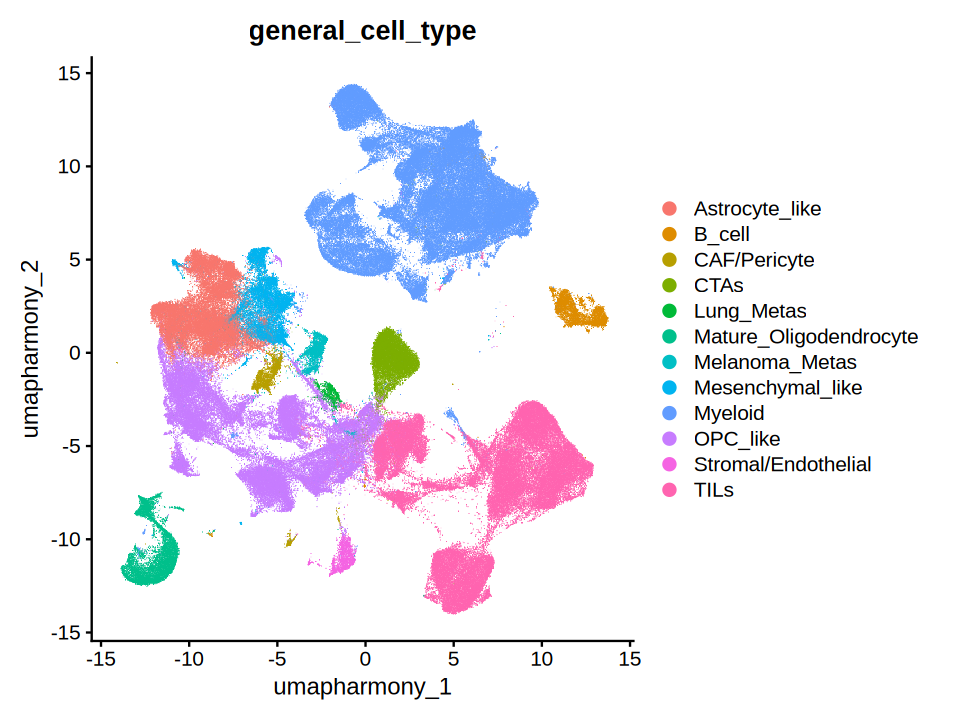

In [55]:
# Generate the base DimPlot
# We use Seurat's built-in rasterization, which is efficient
p_base <- DimPlot(
    obj,
    reduction = "umap.harmony",   # Requirement: Use 'umap.harmony'
    group.by = "general_cell_type", # Requirement: Group by cell type
    
    # Data Representation Requirements
    label = FALSE,                # Requirement: No text labels on plot
    pt.size = 1.5,                # Requirement: Small point size for 350k cells
    
    # Rasterization Requirement
    raster = TRUE,                # Requirement: Rasterize point layer
    raster.dpi = c(1024, 1024)    # High DPI for crisp points
)

p_base

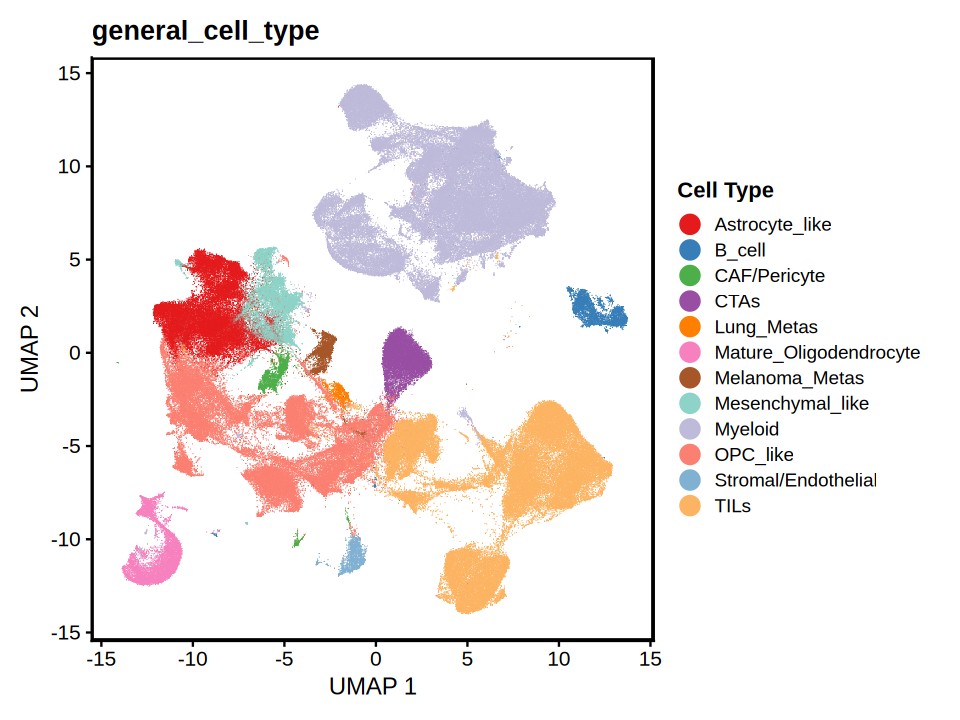

In [56]:
p_formatted <- p_base +
    # Apply the custom, named color palette
    scale_color_manual(values = custom_colors) +

    # Set correct axis and legend titles
    labs(
        x = "UMAP 1",
        y = "UMAP 2",
        color = "Cell Type" # Renames the legend title
    ) +

    # Apply a minimal, publication-ready theme
    theme_cowplot() +
    
    # Theme adjustments for a clean, final look
    theme(
        # Set text sizes
        axis.text = element_text(size = 12, color = "black"),
        axis.title = element_text(size = 14, color = "black"),
        legend.text = element_text(size = 11, color = "black"),
        legend.title = element_text(size = 13, face = "bold", color = "black"),
        
        # Requirement: Remove all background gridlines
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        
        # Requirement: Add a clean panel border
        panel.border = element_rect(color = "black", fill = NA, size = 1),
        
        # Ensure plot axis lines are visible
        axis.line = element_line(color = "black")
    ) +
    
    # Requirement: Increase legend point size for clarity
    guides(color = guide_legend(
        override.aes = list(size = 5),
        ncol = 1 # Ensure legend is a single vertical column
    ))

p_formatted